# Importación


In [225]:
import pandas as pd
import numpy as np 
import plotly as ply
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go


In [226]:
df_RatedFlights = pd.read_csv('rated_flights.csv')

df_RatedFlights

,Date,Airline,Departure,Arrival,OverallRating,ReportLink
0,19/01/2025,LATAM Brasil,NATNatal Greater Natal International Airport,GRUSao Paulo Guarulhos Int'l,7,../flightlog/report_625375_LATAM Brasil_3443.htm
1,13/01/2025,KLM,BCNBarcelona El Prat,AMSAmsterdam Schiphol,8,../flightlog/report_624841_KLM_1518.htm
2,11/01/2025,Azul Linhas Aereas,SSASalvador Deputado Luís Eduardo Magalhães In...,RECRecife Guararapes - Gilberto Freyre Int'l,10,../flightlog/report_625374_Azul Linhas Aereas_...
3,09/01/2025,Garuda,SINSingapore Changi,CGKJakarta Soekarno - Hatta,9,../flightlog/report_624575_Garuda_839.htm
4,08/01/2025,Azul Linhas Aereas,GRUSao Paulo Guarulhos Int'l,IOSIlheus,10,../flightlog/report_625373_Azul Linhas Aereas_...
...,...,...,...,...,...,...
3095,25/05/2003,DutchBird,LPALas Palmas De Gran Canaria Gando,AMSAmsterdam Schiphol,7,../flightlog/report_221289_DutchBird_902.htm
3096,12/05/2003,DutchBird,AMSAmsterdam Schiphol,LPALas Palmas De Gran Canaria Gando,6,../flightlog/report_221286_DutchBird_901.htm
3097,12/05/2003,DutchBird,LPALas Palmas De Gran Canaria Gando,FORFortaleza Pinto Martins,7,../flightlog/report_221287_DutchBird_901.htm
3098,07/02/2003,IrAero,CGKJakarta Soekarno - Hatta,SUBSurabaya Juanda,7,../flightlog/report_339682_IrAero_200.htm


Los datos presentados corresponden a algunos de los vuelos sucitados entre los años 2002-2024, en el cual se destaca como variable categórica el overall rating el cual ponderiza el rating que las personas le dieron a su experiencia en el check-in, waiting and boarding, in flight y arrival 

Los únicos datos con un componente "subjetivo" son el overall rating y los remarks dentro del reportLink, ya que reflejan la percepción individual de cada experiencia.

# Limpieza

Los datos ingresados manualmente se validan antes de incluirse en el reporte, verificando aerolíneas y ciudades según sus códigos. Además, el formato se asegura automáticamente mediante un formulario con validación en tiempo real

In [227]:
nans= df_RatedFlights.isnull().sum()
print(nans)

#no missing values in the dataset

Date             0
Airline          0
Departure        0
Arrival          0
OverallRating    0
ReportLink       0
dtype: int64


In [228]:
duplicates= df_RatedFlights.duplicated()

print(duplicates.sum())

#no duplicates in the dataset

0


# Exploración y visualización 

## Análisis de vuelos en el Dataframe: **df_RatedFlights**

### Existencia de vuelos que partan de una ciudad y regresen a la misma

In [229]:
sameDepArrFlights= df_RatedFlights['Departure'] == df_RatedFlights['Arrival']
print("vuelos de origen y destino igual:",sameDepArrFlights.sum())

vuelos de origen y destino igual: 9


In [230]:
df_RatedFlights[sameDepArrFlights]

,Date,Airline,Departure,Arrival,OverallRating,ReportLink
688,25/05/2022,Sundair,DRSDresden Klotzsche Airport,DRSDresden Klotzsche Airport,10,../flightlog/report_545086_Sundair_1960.htm
701,18/04/2022,Sundair,LEJLeipzig,LEJLeipzig,8,../flightlog/report_542960_Sundair_8796.htm
756,05/02/2022,Air New Zealand,AKLAuckland Auckland International Airport,AKLAuckland Auckland International Airport,10,../flightlog/report_537770_Air New Zealand_601...
760,19/01/2022,Air New Zealand,VCVVictorville George AFB - USA California,VCVVictorville George AFB - USA California,10,../flightlog/report_536960_Air New Zealand_600...
821,16/10/2021,Danish Air Transport,CPHCopenhagen Kastrup,CPHCopenhagen Kastrup,10,../flightlog/report_530715_Danish Air Transpor...
970,07/11/2020,Eurowings,TXLBerlin Tegel,TXLBerlin Tegel,8,../flightlog/report_508926_Eurowings_5237.htm
1735,04/03/2017,Delta Air Lines,ATLAtlanta Hartsfield Jackson International - ...,ATLAtlanta Hartsfield Jackson International - ...,9,../flightlog/report_389510_Delta Air Lines_31.htm
2264,11/11/2014,KLM,AMSAmsterdam Schiphol,AMSAmsterdam Schiphol,10,../flightlog/report_339228_KLM_9895.htm
3031,26/11/2010,KLM,AMSAmsterdam Schiphol,AMSAmsterdam Schiphol,8,../flightlog/report_391038_KLM_803.htm


Se descartan, pues, carecen de confiabilidad

In [231]:
df_RatedFlights.drop(df_RatedFlights[sameDepArrFlights].index, inplace=True)

## Análisis de las aerolineas en el Dataframe: **df_RatedFlights**

In [232]:
uniqueArilines = df_RatedFlights["Airline"].unique()

print(f"hay {uniqueArilines.size} aerolineas registradas")

hay 313 aerolineas registradas


In [233]:
#convertimos en csv el uniqueArilines
# uniqueArilines.sort()
# df_Airlines = pd.DataFrame(uniqueArilines, columns=['Airline'])
# df_Airlines.to_csv('airlines.csv', index=False)


Obtenemos los paises de los que son cada una de las aerolineas puesto que es una variable que puede influir en el OverallRating

In [234]:
df_Airlines = pd.read_csv('airlines.csv')

df_RatedFlights["Country_Airline"] = df_RatedFlights["Airline"].map(df_Airlines.set_index('Airline')['Country'])

df_RatedFlights

,Date,Airline,Departure,Arrival,OverallRating,ReportLink,Country_Airline
0,19/01/2025,LATAM Brasil,NATNatal Greater Natal International Airport,GRUSao Paulo Guarulhos Int'l,7,../flightlog/report_625375_LATAM Brasil_3443.htm,Brasil
1,13/01/2025,KLM,BCNBarcelona El Prat,AMSAmsterdam Schiphol,8,../flightlog/report_624841_KLM_1518.htm,Países Bajos
2,11/01/2025,Azul Linhas Aereas,SSASalvador Deputado Luís Eduardo Magalhães In...,RECRecife Guararapes - Gilberto Freyre Int'l,10,../flightlog/report_625374_Azul Linhas Aereas_...,Brasil
3,09/01/2025,Garuda,SINSingapore Changi,CGKJakarta Soekarno - Hatta,9,../flightlog/report_624575_Garuda_839.htm,Indonesia
4,08/01/2025,Azul Linhas Aereas,GRUSao Paulo Guarulhos Int'l,IOSIlheus,10,../flightlog/report_625373_Azul Linhas Aereas_...,Brasil
...,...,...,...,...,...,...,...
3095,25/05/2003,DutchBird,LPALas Palmas De Gran Canaria Gando,AMSAmsterdam Schiphol,7,../flightlog/report_221289_DutchBird_902.htm,Países Bajos
3096,12/05/2003,DutchBird,AMSAmsterdam Schiphol,LPALas Palmas De Gran Canaria Gando,6,../flightlog/report_221286_DutchBird_901.htm,Países Bajos
3097,12/05/2003,DutchBird,LPALas Palmas De Gran Canaria Gando,FORFortaleza Pinto Martins,7,../flightlog/report_221287_DutchBird_901.htm,Países Bajos
3098,07/02/2003,IrAero,CGKJakarta Soekarno - Hatta,SUBSurabaya Juanda,7,../flightlog/report_339682_IrAero_200.htm,Rusia


## Ranking de aerolineas por OverallRating

In [235]:
airlinesBYoverallratingCount=df_RatedFlights.groupby('Airline').agg({'OverallRating':'count'}).sort_values(by='OverallRating', ascending=False)


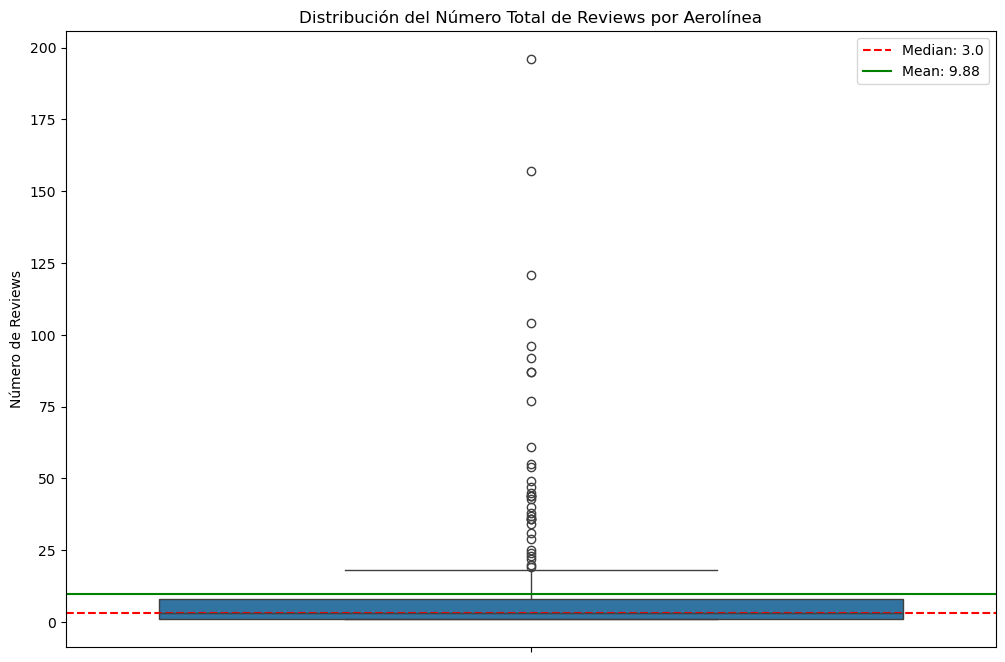

In [236]:


median_value = airlinesBYoverallratingCount['OverallRating'].median()
mean_value = airlinesBYoverallratingCount['OverallRating'].mean()

plt.figure(figsize=(12, 8))
sns.boxplot(data=airlinesBYoverallratingCount, y='OverallRating')
plt.axhline(median_value, color='r', linestyle='--', label=f'Median: {median_value}')
plt.axhline(mean_value, color='g', linestyle='-', label=f'Mean: {mean_value.__round__(2)}')
plt.title('Distribución del Número Total de Reviews por Aerolínea')
plt.ylabel('Número de Reviews')
plt.legend()
plt.show()

In [237]:
airlinesBYoverallratingCount.describe() 

,OverallRating
count,313.000000
mean,9.875399
std,21.475250
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,196.000000


Se decide descartar las que tengan menos de la media de ratings

In [238]:
airlinesBYoverallratingCount = airlinesBYoverallratingCount[airlinesBYoverallratingCount['OverallRating'] > 3]
df_RatedFlights_airlineBYrating_filtered = df_RatedFlights[df_RatedFlights['Airline'].isin(airlinesBYoverallratingCount.index)]

df_RatedFlights_airlineBYrating_filtered.index = range(df_RatedFlights_airlineBYrating_filtered.shape[0]) #Nuevo dataframe a usar


In [239]:
top25AirlinesByOverallRating = df_RatedFlights_airlineBYrating_filtered.groupby('Airline').agg({'OverallRating':'mean'}).sort_values(by='OverallRating', ascending=False).head(25)


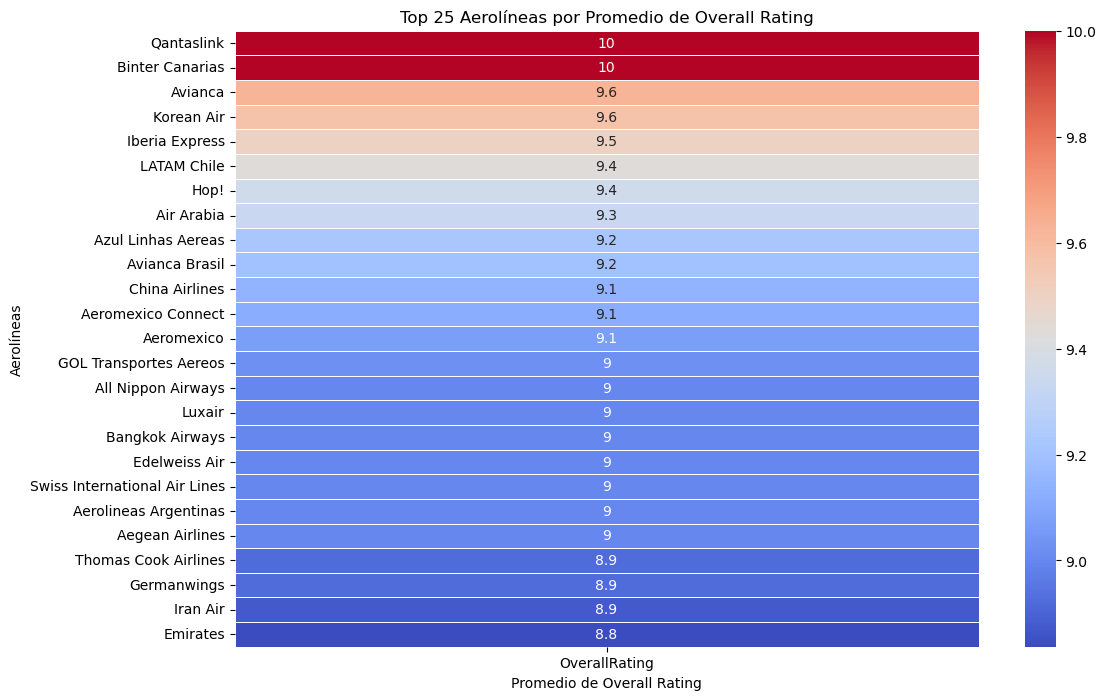

In [240]:
top25AirlinesByOverallRating
# Crear un heatmap para mostrar el top 25 de aerolíneas y sus respectivos promedios de OverallRating
plt.figure(figsize=(12, 8))
sns.heatmap(top25AirlinesByOverallRating[['OverallRating']], annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Top 25 Aerolíneas por Promedio de Overall Rating')
plt.xlabel('Promedio de Overall Rating')
plt.ylabel('Aerolíneas')
plt.show()

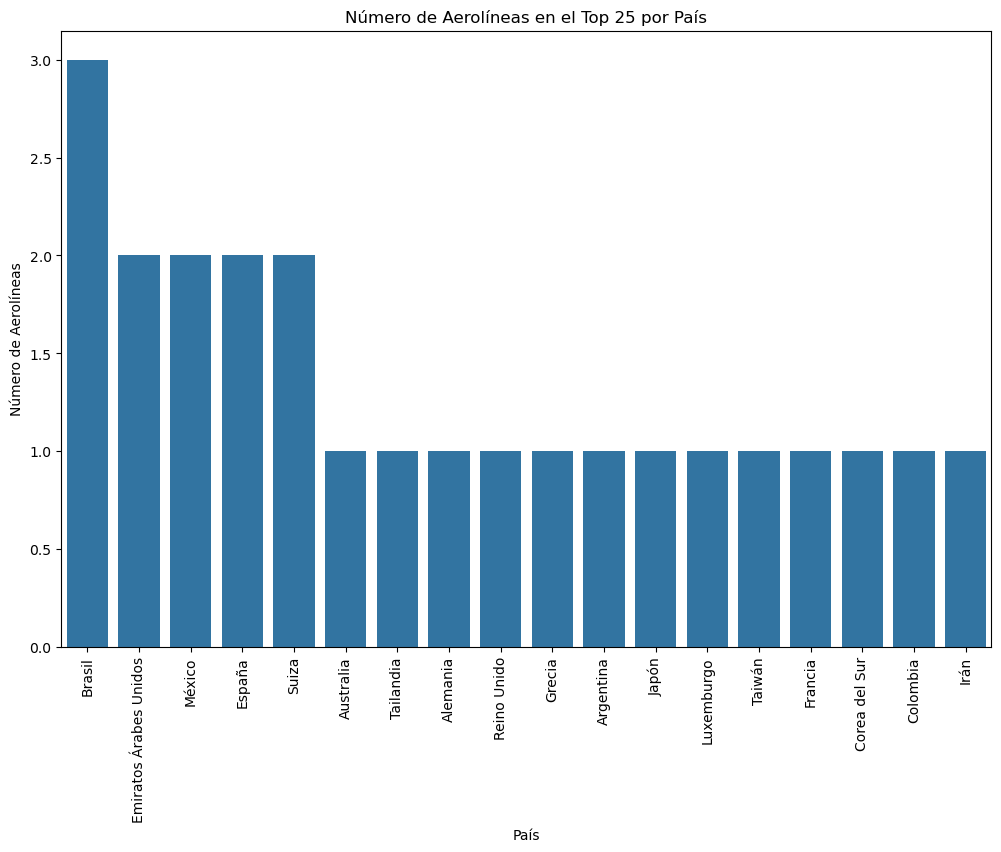

In [241]:
# Obtener los países de las aerolíneas en top25AirlinesByOverallRating
top25AirlinesByOverallRating['Country'] = top25AirlinesByOverallRating.index.map(df_Airlines.set_index('Airline')['Country'])

top25AirlinesByOverallRating
# Calcular el promedio de OverallRating por país
country_avg_rating = top25AirlinesByOverallRating.groupby('Country').agg({'OverallRating': 'mean'}).sort_values(by='OverallRating', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.countplot(data=top25AirlinesByOverallRating, x='Country', order=top25AirlinesByOverallRating['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Número de Aerolíneas en el Top 25 por País')
plt.xlabel('País')
plt.ylabel('Número de Aerolíneas')
plt.grid(False)
plt.show()


## Incorporación de los demás dataframes

In [242]:
df_plane_crashes = pd.read_csv('plane_crashes.csv')
df_plane_crashes

,Date,Location,Aboard,Fatalities,Summary
0,"Date:September 17, 1908","Location:Fort Myer, Virginia",Aboard:2 (passengers:1 crew:1),Fatalities:1 (passengers:1 crew:0),"Summary:During a demonstration flight, a U.S. ..."
1,"Date:September 07, 1909","Location:Juvisy-sur-Orge, France",Aboard:1 (passengers:0 crew:1),Fatalities:1 (passengers:0 crew:0),Summary:Eugene Lefebvre was the first pilot to...
2,"Date:September 17, 1908","Location:Fort Myer, Virginia",Aboard:2 (passengers:1 crew:1),Fatalities:1 (passengers:1 crew:0),"Summary:During a demonstration flight, a U.S. ..."
3,"Date:September 07, 1909","Location:Juvisy-sur-Orge, France",Aboard:1 (passengers:0 crew:1),Fatalities:1 (passengers:0 crew:0),Summary:Eugene Lefebvre was the first pilot to...
4,"Date:July 12, 1912","Location:Atlantic City, New Jersey",Aboard:5 (passengers:0 crew:5),Fatalities:5 (passengers:0 crew:5),Summary:First U.S. dirigible Akron exploded ju...
...,...,...,...,...,...
4960,"Date:October 20, 2024","Location:Pohuwato, Indonesia",Aboard:4 (passengers:1 crew:3),Fatalities:4 (passengers:1 crew:3),Summary:While attempting to land at Bumi Panua...
4961,"Date:November 25, 2024","Location:Vilnius, Lithuania",Aboard:2 (passengers:4 crew:2),Fatalities:1 (passengers:0 crew:1),Summary:The cargo plane was destroyed after it...
4962,"Date:December 25, 2024","Location:Aktau, Kazakstan",Aboard:67 (passengers:62 crew:5),Fatalities:38 (passengers:36 crew:2),Summary:The plane departed Baku for regular se...
4963,"Date:December 29, 2024","Location:Muan, South Korea",Aboard:181 (passengers:175 crew:6),Fatalities:179 (passengers:175 crew:4),"Summary:While attempting to land, the aircraft..."


In [243]:
df_flights_all_years = pd.read_csv('flights_all_years.csv')

df_flights_all_years

,Year,Date,Flights
0,2025 Number of flights,2024-12-31,156956
1,2025 Number of flights,2025-01-01,205823
2,2025 Number of flights,2025-01-02,213193
3,2025 Number of flights,2025-01-03,198500
4,2025 Number of flights,2025-01-04,186594
...,...,...,...
2951,2021 7-day moving average,2025-12-26,155327
2952,2021 7-day moving average,2025-12-27,150982
2953,2021 7-day moving average,2025-12-28,145823
2954,2021 7-day moving average,2025-12-29,141828


Se trabajará con los datos únicamentes del año 2000-2024

In [244]:
#Filtrar anios 2000 - 2024

df_plane_crashes_years=pd.to_datetime(df_plane_crashes['Date'].str.replace("Date:",""), format="%B %d, %Y").dt.year

df_plane_crashes.where(df_plane_crashes_years.between(2000,2024), inplace=True)

df_plane_crashes.dropna(inplace=True)

#Eliminar palabras innecesarias
df_plane_crashes['Location']=df_plane_crashes['Location'].str.replace('Location:','')
df_plane_crashes['Aboard']=df_plane_crashes['Aboard'].str.replace(r'Aboard:?|\(.*\)','', regex=True)
df_plane_crashes['Fatalities']=df_plane_crashes['Fatalities'].str.replace(r'Fatalities:?|\(.*\)','', regex=True)
df_plane_crashes['Summary']=df_plane_crashes['Summary'].str.replace('Summary:','')

df_plane_crashes



,Date,Location,Aboard,Fatalities,Summary
4219,"Date:January 05, 2000","Abuja, Nigeria",16,1,During a visual approach the aircraft stalled ...
4220,"Date:January 10, 2000","Niederhasli, Switzerland",10,10,"The aircraft crashed shortly after taking off,..."
4221,"Date:January 13, 2000","Off Marsa el-Brega, Libya",41,22,The aircraft was on a flight from Tripoli to M...
4222,"Date:January 15, 2000","San Jose, Costa Rica",20,5,The aircraft was not able to maintain altitude...
4223,"Date:January 30, 2000","Off Abidjan, Ivory Coast",179,169,The aircraft crashed into the Atlantic Ocean t...
...,...,...,...,...,...
4959,"Date:August 31, 2024","Vachkazhets volcano Kamchatka, Russia",22,22,The helicopter crashed after strucking rising ...
4960,"Date:October 20, 2024","Pohuwato, Indonesia",4,4,While attempting to land at Bumi Panua Pohuwat...
4961,"Date:November 25, 2024","Vilnius, Lithuania",2,1,The cargo plane was destroyed after it crashed...
4962,"Date:December 25, 2024","Aktau, Kazakstan",67,38,The plane departed Baku for regular service to...
